# **Fake News Classification LSTM**

In [2]:
#importing Libraries
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
from keras.layers import Dropout

In [3]:
data=pd.read_csv('/content/drive/My Drive/Kaggle/train.csv')

In [4]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


We have 4 Attribute corresponding in our dataset.
**Label** tells us wheather News is *Fake or True*


In [5]:
#Dropping NAN Values 
data=data.dropna()

#Dropping Labels from Data
X=data.drop('label',axis=1)
y=data['label']

In [6]:
X.shape

(18285, 4)

In [7]:
y.shape

(18285,)

In [8]:
#Creating VOCAB size
vocab_size=5000

In [9]:
X['title'][0]


'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [10]:
X['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

**Data Preprocessing**

In [11]:
messages=X.copy()
messages.reset_index(inplace=True)
processed_data=list()
ps=PorterStemmer()

for row in range(0,len(messages)):
    news = re.sub('[^a-zA-Z]', ' ', messages['title'][row])
    news = news.lower()
    news = news.split()
    
    news = [ps.stem(word) for word in news if not word in stopwords.words('english')]
    news = ' '.join(news)
    print(row,"\t",news)
    processed_data.append(news)


Streaming output truncated to the last 5000 lines.
13286 	 susan rice ex obama advis back polit cross hair surveil new york time
13287 	 fix nbc affili accident post elect result week earli hillari win presid trump
13288 	 origin unreleas transcript sonia gandhi interview rajdeep sardesai obtain
13289 	 indian man accus multimillion dollar call center swindl held new york time
13290 	 teenag death answer aborigin canadian new york time
13291 	 fashion cast iron pan today cook new york time
13292 	 summer sweat hollywood brace possibl worst box offic decad
13293 	 trump execut order target trade abus amid nafta intrigu breitbart
13294 	 new york time moscow bureau target hacker new york time
13295 	 barbra streisand say sexism cost multipl oscar nomin
13296 	 comey investig red her cover wikileak dump
13297 	 gorsuch tri put polit confirm hear new york time
13298 	 kelsey hark women striker ignor atroc muslim world
13299 	 ken adachi trump win
13300 	 ted cruz call billion seiz el chapo

OneHot Representation for each word in Processed_data based on vocab_size

In [12]:
from keras.preprocessing.text import one_hot
onehot=[one_hot(words,vocab_size)for words in processed_data]


In [13]:
onehot

[[3195, 4244, 295, 2966, 779, 4557, 3993, 4189, 863, 490],
 [4502, 1017, 446, 4466, 1902, 1691, 1349],
 [3575, 327, 1346, 1855],
 [665, 4988, 3711, 774, 1822, 2574],
 [1226, 1902, 1731, 91, 3212, 3832, 1902, 3075, 973, 3969],
 [3254,
  503,
  2234,
  529,
  2439,
  3655,
  334,
  665,
  2375,
  3217,
  1557,
  3176,
  1315,
  46,
  1349],
 [2935, 3372, 3156, 4380, 1642, 1711, 3240, 3904, 2521, 3504, 977],
 [3934, 152, 3475, 4003, 184, 4798, 3655, 996, 2521, 3504, 977],
 [881, 4276, 4671, 1693, 1313, 4393, 45, 2200, 3655, 198],
 [2525, 3391, 4115, 911, 4538, 3279, 2716, 9],
 [67, 649, 1552, 2188, 1038, 2212, 2851, 1620, 4538, 1588, 4190],
 [774, 3862, 779, 4393, 3655, 184],
 [2099, 3059, 300, 695, 2762, 3040, 3934, 893, 1276],
 [4821, 3722, 763, 4850, 62, 1992, 558, 2521, 3504, 977],
 [4093, 3542, 686, 2882, 4044, 2521, 3504, 977],
 [3252, 3851, 4986, 4600, 2077, 4524, 2255, 1636, 3848, 2367],
 [3144, 283, 1017],
 [1232, 3282, 2191, 2487, 3655, 902, 2975, 1349],
 [3275, 2518, 446, 3556,

Zero Padding since inputs length are not constant 

In [14]:
ip_length=20
pad_news=pad_sequences(onehot,padding='post',maxlen=ip_length)
len(pad_news),y.shape


(18285, (18285,))

In [15]:
pad_news

array([[3195, 4244,  295, ...,    0,    0,    0],
       [4502, 1017,  446, ...,    0,    0,    0],
       [3575,  327, 1346, ...,    0,    0,    0],
       ...,
       [ 448, 2605,  672, ...,    0,    0,    0],
       [2591,  184, 3176, ...,    0,    0,    0],
       [4642, 3049, 4874, ...,    0,    0,    0]], dtype=int32)

# **Creating Model**

In [26]:
emb_vector_features=40
model=Sequential()
model.add(Embedding(vocab_size,emb_vector_features,input_length=ip_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
import numpy as np
X=np.array(pad_news)
y=np.array(y)


In [28]:
X

array([[3195, 4244,  295, ...,    0,    0,    0],
       [4502, 1017,  446, ...,    0,    0,    0],
       [3575,  327, 1346, ...,    0,    0,    0],
       ...,
       [ 448, 2605,  672, ...,    0,    0,    0],
       [2591,  184, 3176, ...,    0,    0,    0],
       [4642, 3049, 4874, ...,    0,    0,    0]], dtype=int32)

In [29]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Training Model

In [30]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
192/192 [==============================] - 6s 33ms/step - loss: 0.3232 - accuracy: 0.8431 - val_loss: 0.2057 - val_accuracy: 0.9157
Epoch 2/100
192/192 [==============================] - 6s 31ms/step - loss: 0.1498 - accuracy: 0.9430 - val_loss: 0.2076 - val_accuracy: 0.9186
Epoch 3/100
192/192 [==============================] - 6s 31ms/step - loss: 0.1042 - accuracy: 0.9621 - val_loss: 0.2291 - val_accuracy: 0.9150
Epoch 4/100
192/192 [==============================] - 6s 30ms/step - loss: 0.0758 - accuracy: 0.9736 - val_loss: 0.2582 - val_accuracy: 0.9125
Epoch 5/100
192/192 [==============================] - 6s 31ms/step - loss: 0.0584 - accuracy: 0.9794 - val_loss: 0.3351 - val_accuracy: 0.9122
Epoch 6/100
192/192 [==============================] - 6s 31ms/step - loss: 0.0504 - accuracy: 0.9831 - val_loss: 0.3095 - val_accuracy: 0.9075
Epoch 7/100
192/192 [==============================] - 6s 31ms/step - loss: 0.0312 - accuracy: 0.9895 - val_loss: 0.3571 - val_accuracy:

In [31]:
#Accuracy &perormance matrics
from sklearn.metrics import accuracy_score
y_hat=model.predict_classes(X_test)

accuracy_score(y_test,y_hat)

0.903893951946976

ValueError: ignored

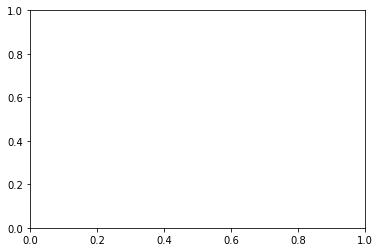

In [33]:
import matplotlib.pyplot as plt
loss_train = history.history['accuracy']
loss_val = history.history['val_loss']
epochs = range(1,35)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()